In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import scipy
from scipy.stats import spearmanr

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [2]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [3]:
address="C:\Data_jupyter\mtcars.csv"
cars=pd.read_csv(address)
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
#First subset the data
cars_data=cars.iloc[:,[5,11]].values
cars_data_names=['drat','carb']
y=cars.iloc[:,9].values  #Target variable 'am'


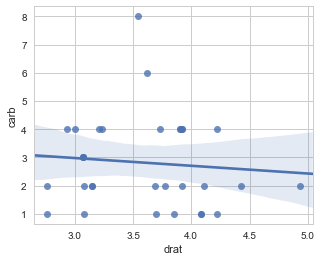

In [7]:
#Checking for Independence bw features 
sb.regplot(x='drat',y='carb',data=cars,scatter=True) #categorical values 

In [8]:
#check if these are independent of each other
drat=cars['drat']
carb=cars['carb']
spearmanr_coeff, p_value=spearmanr(drat,carb)
print('Spearman Rank corelation coefficient %0.3f' %spearmanr_coeff)

Spearman Rank corelation coefficient -0.125


In [9]:
#Check for missing values
cars.isnull().sum() #return how many missing values

car_names    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

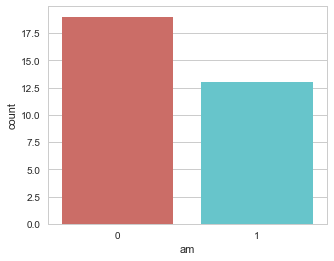

In [11]:
#check is our target variable is binary or ordinal
sb.countplot(x='am',data=cars,palette='hls')
#Here we can see that am is binary 0 & 1

In [13]:
#Check that size of dataset is sufficient 
cars.info()
#only 32 entries it is small but we will continue with this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_names    32 non-null object
mpg          32 non-null float64
cyl          32 non-null int64
disp         32 non-null float64
hp           32 non-null int64
drat         32 non-null float64
wt           32 non-null float64
qsec         32 non-null float64
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [14]:
#Deploying & evaluating your model
X=scale(cars_data)

In [17]:
LogReg=LogisticRegression()

LogReg.fit(X,y)
print(LogReg.score(X,y))


0.8125


In [18]:
y_pred=LogReg.predict(X)
from sklearn.metrics import classification_report

print(classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.79      0.83        19
          1       0.73      0.85      0.79        13

avg / total       0.82      0.81      0.81        32



True positive = correctly identified<br>
False positive = incorrectly identified<br>
True negative = correctly rejected<br>
False negative = incorrectly rejected

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)


The f1-score gives you the harmonic mean of precision and recall.

The support is the number of samples of the true response that lie in that class.